In [1]:
import os
import shutil

import pandas as pd

In [2]:
dir_path = 'data/images/'
train_path='data/images/train/'

# List to store filenames
file_names = []

# Iterate through the directory
for filename in os.listdir(dir_path):
    # Check if the entry is a file
    if os.path.isfile(os.path.join(dir_path, filename)):
        file_names.append(filename)

base_names = []

for filename in file_names:
    base_name, extension = os.path.splitext(filename)
    base_names.append(base_name)

In [3]:
# CSV file path
csv_file = pd.read_csv('data/train_ids_labels.csv')
image_ids=csv_file['Image_ID']

In [9]:
set1=set(base_names)
set2=set(image_ids)

dir_not_csv=set1-set2
csv_not_dir=set2-set1

print(list(csv_not_dir))
print(list(dir_not_csv))

['OjupjWqJlITTMhC', 'wRxDWFAuOfCYLhz', 'JzuFNjYEZoPVcsd', 'qNaXnfwrHeSUgyq', 'EbkPqQTTnlGZOTk', 'FGJlaHbAWGkBvFe', 'vlqngsXyzvDUgQe', 'kJooJAzfcoYdUCy', 'WlPSfKzgxDLiGzH', 'jNllUfgdGrJmdsc', 'iNIkLNFQfVXUfrO', 'xVkHqUJykWdtpam', 'PFuDjiWgrJooTzJ', 'nySSFSIzZwMSuEF', 'BdfnMmhHDxRMXEI', 'qSqvxOPyuNrrHNB', 'ZjooVfoZKqbXHhh', 'DQYGcJdywdPbwkI', 'KByvjjSDZxOTTIw', 'rjImApnXKgODLnN', 'ilhFVEQirqiclQw', 'gkUFBeiRdlymOZi', 'merGGkLlQFhEpBl', 'wglmaPqSqlerrbI', 'YmtrDMUqotdHjZo', 'uWtsJvoWqNyRatc', 'wOvgObHHGCCcfai', 'ANMlbaMqlecrvbT', 'yihoIZBkuBcEFMk', 'xvBLnmSmvrHxVmZ', 'BwyzZkFpzPuyWih', 'kfMnhyBeLyfqHRD', 'JfZrTZbbFRZyIwJ', 'hSCOdrjFnovfgqF', 'BFZCZMDzNizRBcy', 'sUojWKsmgBDTvyk', 'KpnfpjBTidRWDWR', 'JzlwiwNjtFFhNhm', 'BXiWPGVdIVGpryC', 'WYMRyCYjXrIeibw', 'meGlerzXUnGHfuY', 'XObnvXuQoJDvvkj', 'swYImEpjsNdwcJr', 'TMDpvVpAVYzrhuZ', 'EeuNuoaAfDKfFNP', 'XlSzldvKZTWiXit', 'hSTnCsLtsaTNwrQ', 'bSQjFuySBKaNWxl', 'kMphUxRYMdcBFgC', 'VZUdOJjQyxFOEXs', 'eDuEHXSvEsCKubA', 'MwvYQKmEhOFqmzA', 'LBjOSNFQKn

In [4]:
df=pd.DataFrame(csv_file)

df.head()

,Image_ID,Label
0,cVOfkSdqnWXUerr,0
1,EhnvIDPXFFjUhkR,0
2,tYKqoStvHsryFhS,1
3,eSpjlsZIwOMLmUS,1
4,uzxhIXjNENLyHwZ,1


In [21]:
for index, row in df.iterrows():
    filename = row['Image_ID']
    label = str(row['Label'])  
    
    # Check if the filename with default extension exists in the source directory
    full_filename = filename + '.jpg'
    if os.path.exists(os.path.join(dir_path, full_filename)):
        # Create directory based on the label if it doesn't exist
        label_dir = os.path.join(train_path, label)
        if not os.path.exists(label_dir):
            os.makedirs(label_dir)
        
        shutil.move(os.path.join(dir_path, full_filename), os.path.join(label_dir, full_filename))
        print(f"Moved {full_filename} to {label_dir}")
    else:
        print(f"File {full_filename} not found in {dir_path}")


Moved cVOfkSdqnWXUerr.jpg to data/images/train\0
Moved EhnvIDPXFFjUhkR.jpg to data/images/train\0
Moved tYKqoStvHsryFhS.jpg to data/images/train\1
Moved eSpjlsZIwOMLmUS.jpg to data/images/train\1
Moved uzxhIXjNENLyHwZ.jpg to data/images/train\1
Moved hezYtxLhHStWATz.jpg to data/images/train\0
Moved LcZuJysTXaSNBDe.jpg to data/images/train\1
Moved RiWvALRpGwyReTK.jpg to data/images/train\0
Moved kYQZTGpDvwXUZlu.jpg to data/images/train\0
Moved VxXuRhwhHDvGWty.jpg to data/images/train\0
Moved PVseTpBvTnqLDmk.jpg to data/images/train\0
Moved FYshteAhtFDNsRp.jpg to data/images/train\0
Moved gXTcncVAclMwbgO.jpg to data/images/train\0
Moved EgbUBlfMujzEgNp.jpg to data/images/train\0
Moved YlkqqPNsItojlbd.jpg to data/images/train\1
Moved QSCIuzoPpaNAIJG.jpg to data/images/train\0
Moved XcAfqmUulhlZSxb.jpg to data/images/train\1
Moved dnWYyhuFKHvYLUP.jpg to data/images/train\0
Moved ZbLhYIeGqrbjDsV.jpg to data/images/train\1
Moved IRBwPwewbNqtmXJ.jpg to data/images/train\0
Moved TtGADjTPcKRlGV

In [5]:
from fastai.vision.all import *

In [6]:
classes=['0','1']

In [7]:
roads=DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(0.2),
                  get_y=parent_label,
                  item_tfms=RandomResizedCrop(460),
                  batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [8]:
#path=Path(dir_path)
dls=roads.dataloaders(train_path, bs=32)

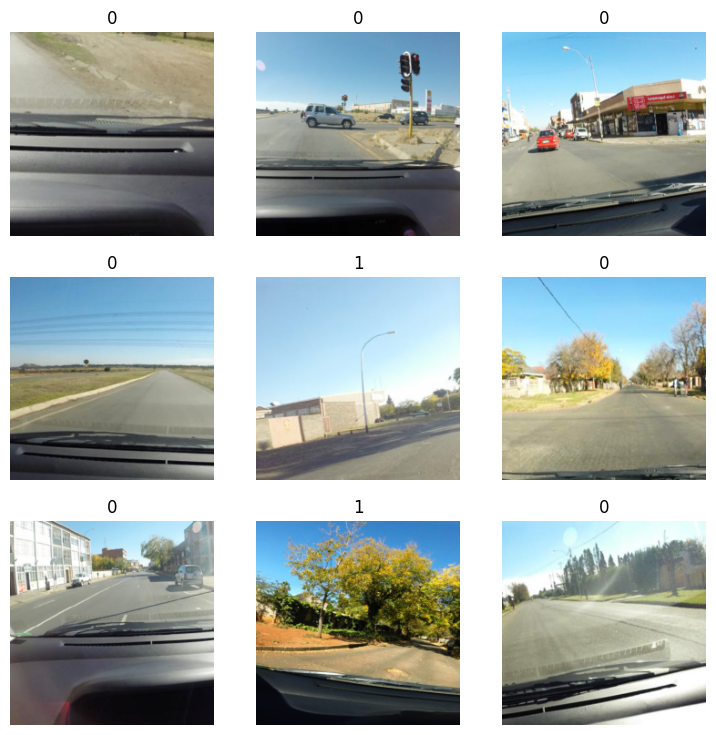

In [9]:
dls.show_batch(max_n=9)

['0', '1', 'images']

In [12]:
learn = vision_learner(dls, resnet34, pretrained=True, metrics=[accuracy]).to_fp16()


In [13]:
learn.fit_one_cycle(10)


epoch,train_loss,valid_loss,accuracy,time
0,0.953260,0.465185,0.791304,02:37
1,0.748312,0.348413,0.834783,02:29
2,0.597787,0.283932,0.895652,03:21
3,0.461611,0.242415,0.903106,03:14
4,0.389978,0.217705,0.911801,03:05
5,0.339970,0.209884,0.919255,02:48
6,0.316275,0.224181,0.913043,03:06
7,0.310135,0.186640,0.924224,03:15
8,0.288232,0.191350,0.925466,03:25
9,0.278966,0.184358,0.926708,02:59
